In [ ]:
import numpy as np
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from collections import Counter

In [ ]:
df = pd.read_csv('/content/dataPerbankan.csv')
df

,at,userName,content,score,application
0,2022-12-31 15:33:31,Miftah Assundawi,di update malah ngabisin pulsa buat verifikasi...,1,BCA
1,2022-12-31 09:31:31,muhamad maulana ahsan,udah scan dokumen sama scan wajah berulang kal...,1,BCA
2,2022-12-31 06:42:45,Lanjutkan Di Kita Official,adminnya jawaban selalu monoton mohon mengirim...,1,BCA
3,2022-12-31 05:59:59,Beizi Nakata,aplikasi ini menjadi gak guna masa mengenali w...,1,BCA
4,2022-12-31 03:45:08,Akhmad Supriyanto,di update malah nyusahinlogin beberapa kali te...,1,BCA
...,...,...,...,...,...
6165,2024-09-23 19:47:35,Alkarim Sukamti,tidak bisa dibukadisentuh jg tdk bisapdahal ba...,2,BRI
6166,2024-09-23 19:41:03,Setya Yiyin,sangat membantu dan mudah di gunakan dan efesi...,5,BRI
6167,2024-09-23 19:27:20,Kristop Hura,mantapp cepat tepat dan akurat,5,BRI
6168,2024-09-23 19:26:09,Oshin Bali,sangat mudah digunakan untuk transasi apapun t...,5,BRI


##2. PREPROCESSING

In [ ]:
def filter_tokens_by_length(dataframe, column, min_words, max_words):
  words_count = dataframe[column].astype(str).apply(lambda x:len(x.split()))
  mask = (words_count >= min_words) & (words_count <= max_words)
  filtered_df = dataframe[mask]
  return filtered_df

min_words = 3
max_words = 50
df = filter_tokens_by_length(df, 'content', min_words, max_words)

In [ ]:
columns_4 = df[['at', 'userName', 'score', 'application']]

In [ ]:
columns_4

,at,userName,score,application
0,2022-12-31 15:33:31,Miftah Assundawi,1,BCA
1,2022-12-31 09:31:31,muhamad maulana ahsan,1,BCA
2,2022-12-31 06:42:45,Lanjutkan Di Kita Official,1,BCA
3,2022-12-31 05:59:59,Beizi Nakata,1,BCA
4,2022-12-31 03:45:08,Akhmad Supriyanto,1,BCA
...,...,...,...,...
6165,2024-09-23 19:47:35,Alkarim Sukamti,2,BRI
6166,2024-09-23 19:41:03,Setya Yiyin,5,BRI
6167,2024-09-23 19:27:20,Kristop Hura,5,BRI
6168,2024-09-23 19:26:09,Oshin Bali,5,BRI


In [ ]:
norm = {'bisa2' : 'bisa', 'ngga' : 'lo', 'kamu' : 'aplikasi', 'tdk' : 'tidak', 'gk' : 'tidak', 'profisional' : 'profesional', 'skrng' : 'sekarang', 'uwang' : 'uang', 'tiktokan' : 'tiktok', 'yg' : 'yang', 'udh' : 'sudah', 'wkwk' : 'tertawa', 'min' : 'kak', 'malem' : 'malam', 'malem2' : 'malam', 'sm' : 'sama', 'dy' : 'dia', 'lg' : 'lagi', 'skrg' : 'sekarang', 'ddpn' : 'depan', 'makasi' : 'makasih', 'pertamaz' : 'pertamax', 'jg' : 'juga', 'donk' : 'dong', 'ikutann' : 'ikutan', 'banyakk' : 'banyak', 'twt' : 'tweet', 'mantaap' : 'mantap', 'juarak' : 'juara', 'daridulu' : 'dari dulu', 'siapp' : 'siap', 'gamau' : 'tidak mau', 'sll' : 'selalu', 'qu' : 'aku', 'krn' : 'karena', 'irii' : 'iri', 'muluu' : 'terus', 'mada' : 'masa', 'jgn' : 'jangan', 'muluuu' : 'terus', 'ntar' : 'sebentar', 'awtnya' : 'awetnya', 'gg' : 'keren', 'kerennn' : 'keren', 'bisaa' : 'bisa', 'gaaa' : 'tidak', ' yg ' : 'yang', ' nyampe' : 'sampai', ' nyampe ' : 'sampai', 'lu' : 'kamu', 'ikhlaaasss' : 'ikhlas', 'gak' : 'tidak', 'klo' : 'kalo', 'amp' : 'sampai', ' ga ' : 'tidak', ' yaaaa' : 'ya', 'betolll' : 'betul', ' kaga' : 'tidak', ' idk ' : 'tidak tahu', 'jkt' : 'jakarta', 'dgn ' : 'dengan', ' kismin ' : 'miskin',}

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))

<ipython-input-9-e0a57d4963a1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content'] = df['content'].apply(lambda x: normalisasi(x))


In [ ]:
pip install Sastrawi

In [ ]:
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopword(x))
df.sample(5)

<ipython-input-11-66698988e79a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content'] = df['content'].apply(lambda x: stopword(x))


,at,userName,content,score,application
2983,2023-10-07 00:13:14,Rizky Aulia,menu share download mutasi rekening di share d...,1,BNI
5938,2024-09-26 10:59:29,Sukam To,brimo transaksi lebih mudah cepat,4,BRI
4875,2022-08-16 01:58:03,Rijkiah Tarimakase,aplikasi menyulitkan kualitas video maksimal t...,1,BRI
4046,2024-09-06 23:28:19,RULLY ANGGA LAKSANA,kamumayan kecewa semenjak aplikasi wondr jadi ...,1,BNI
3568,2024-09-27 09:20:36,Kantata taqwa chanel,kakta dong log in nya kok sekarang susah masa ...,4,BNI


In [ ]:
tokenized = df['content'].apply(lambda x:x.split())
tokenized

,content
0,"[update, malah, ngabisin, pulsa, buat, verifik..."
1,"[udah, scan, dokumen, sama, scan, wajah, berul..."
2,"[adkaknya, jawaban, selakamu, monoton, mohon, ..."
3,"[aplikasi, menjadi, guna, masa, mengenali, waj..."
4,"[update, malah, nyusahinlogin, beberapa, kali,..."
...,...
6165,"[bisa, dibukadisentuh, bisapdahal, baru, buat,..."
6166,"[sangat, membantu, mudah, gunakan, efesien, wa..."
6167,"[mantapp, cepat, tepat, akurat]"
6168,"[sangat, mudah, digunakan, transasi, apapun, t..."


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in text_cleaning:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  return d_clean

tokenized = tokenized.apply(stemming)

In [ ]:
df = pd.concat([tokenized, columns_4], axis=1)
df

,content,at,userName,score,application
0,update malah ngabisin pulsa buat verifikasi le...,2022-12-31 15:33:31,Miftah Assundawi,1,BCA
1,udah scan dokumen sama scan wajah ulang kali t...,2022-12-31 09:31:31,muhamad maulana ahsan,1,BCA
2,adkaknya jawab selaka monoton mohon kirim scre...,2022-12-31 06:42:45,Lanjutkan Di Kita Official,1,BCA
3,aplikasi jadi guna masa nali wajah milik nya b...,2022-12-31 05:59:59,Beizi Nakata,1,BCA
4,update malah nyusahinlogin beberapa kali tetep...,2022-12-31 03:45:08,Akhmad Supriyanto,1,BCA
...,...,...,...,...,...
6165,bisa dibukadisentuh bisapdahal baru buat brimo...,2024-09-23 19:47:35,Alkarim Sukamti,2,BRI
6166,sangat bantu mudah guna efesien waktu,2024-09-23 19:41:03,Setya Yiyin,5,BRI
6167,mantapp cepat tepat akurat,2024-09-23 19:27:20,Kristop Hura,5,BRI
6168,sangat mudah guna transasi apa trims brimo,2024-09-23 19:26:09,Oshin Bali,5,BRI


labeling

In [ ]:
def label_sentiment(score):
  if score <= 2:
    return 'negatif'
  elif score == 3:
    return 'netral'
  else:
    return 'positif'

df['sentimen'] = df['score'].apply(label_sentiment)

In [ ]:
df_counts = df.sentimen.value_counts()
df_counts

,count
sentimen,
negatif,3135
positif,1375
netral,471


visualisasi

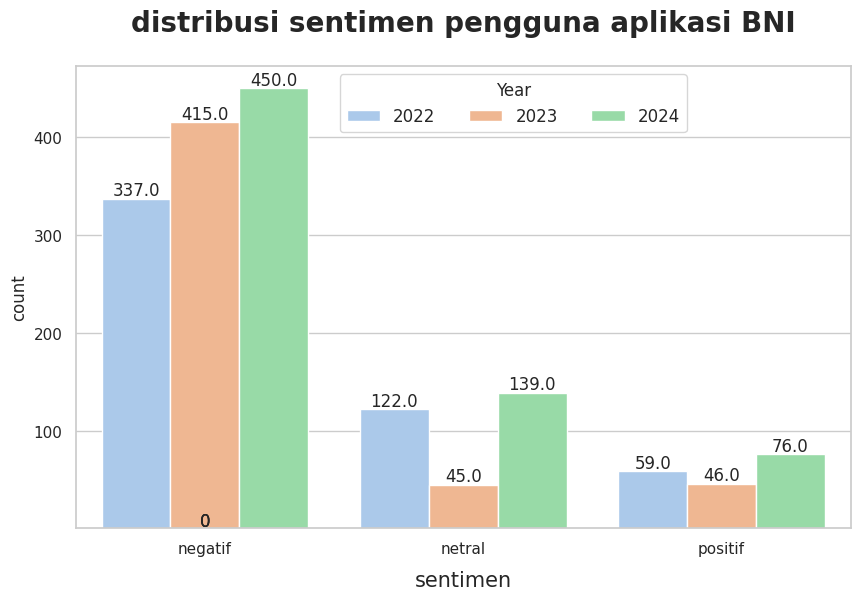

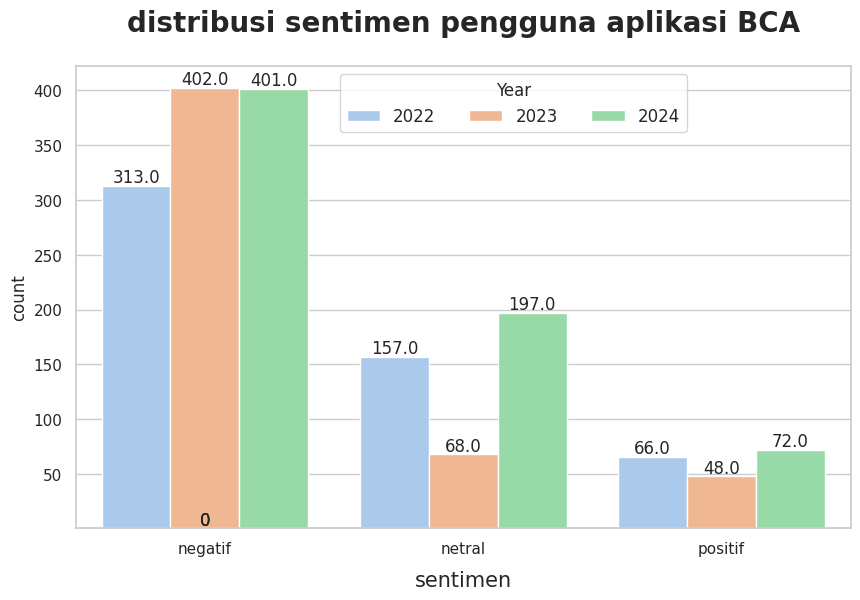

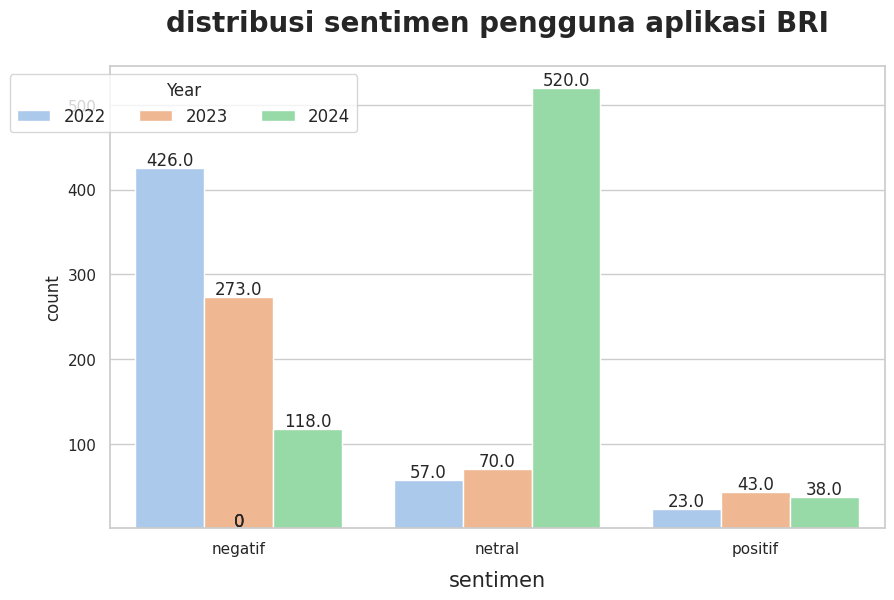

In [ ]:
df['at'] = pd.to_datetime(df['at'])
df['year'] = df['at'].dt.year
applications = ['BNI', 'BCA', 'BRI']

for app in applications:
  df_app = df[df['application']==app]
  position = range(len(df_app['sentimen'].unique()))
  labels = sorted(df_app['sentimen'].unique())

  ax = sns.set_style('whitegrid')
  plt.figure(figsize=(10,6))
  ax = sns.countplot(x='sentimen',hue='year', data=df_app, palette='pastel')

  for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2,
            rect.get_height() + 3.25, rect.get_height(),
            horizontalalignment='center', fontsize=12)

  plt.legend(fontsize=12, bbox_to_anchor=(0.33,1), ncol=3, title='Year', title_fontsize=12)
  plt.title(f'distribusi sentimen pengguna aplikasi {app}', fontsize=20, fontweight='bold' ,pad=25)
  plt.xlabel('sentimen', fontsize=15, labelpad=10)
  plt.xticks(position, labels)
  plt.ylim(1)
  plt.show()

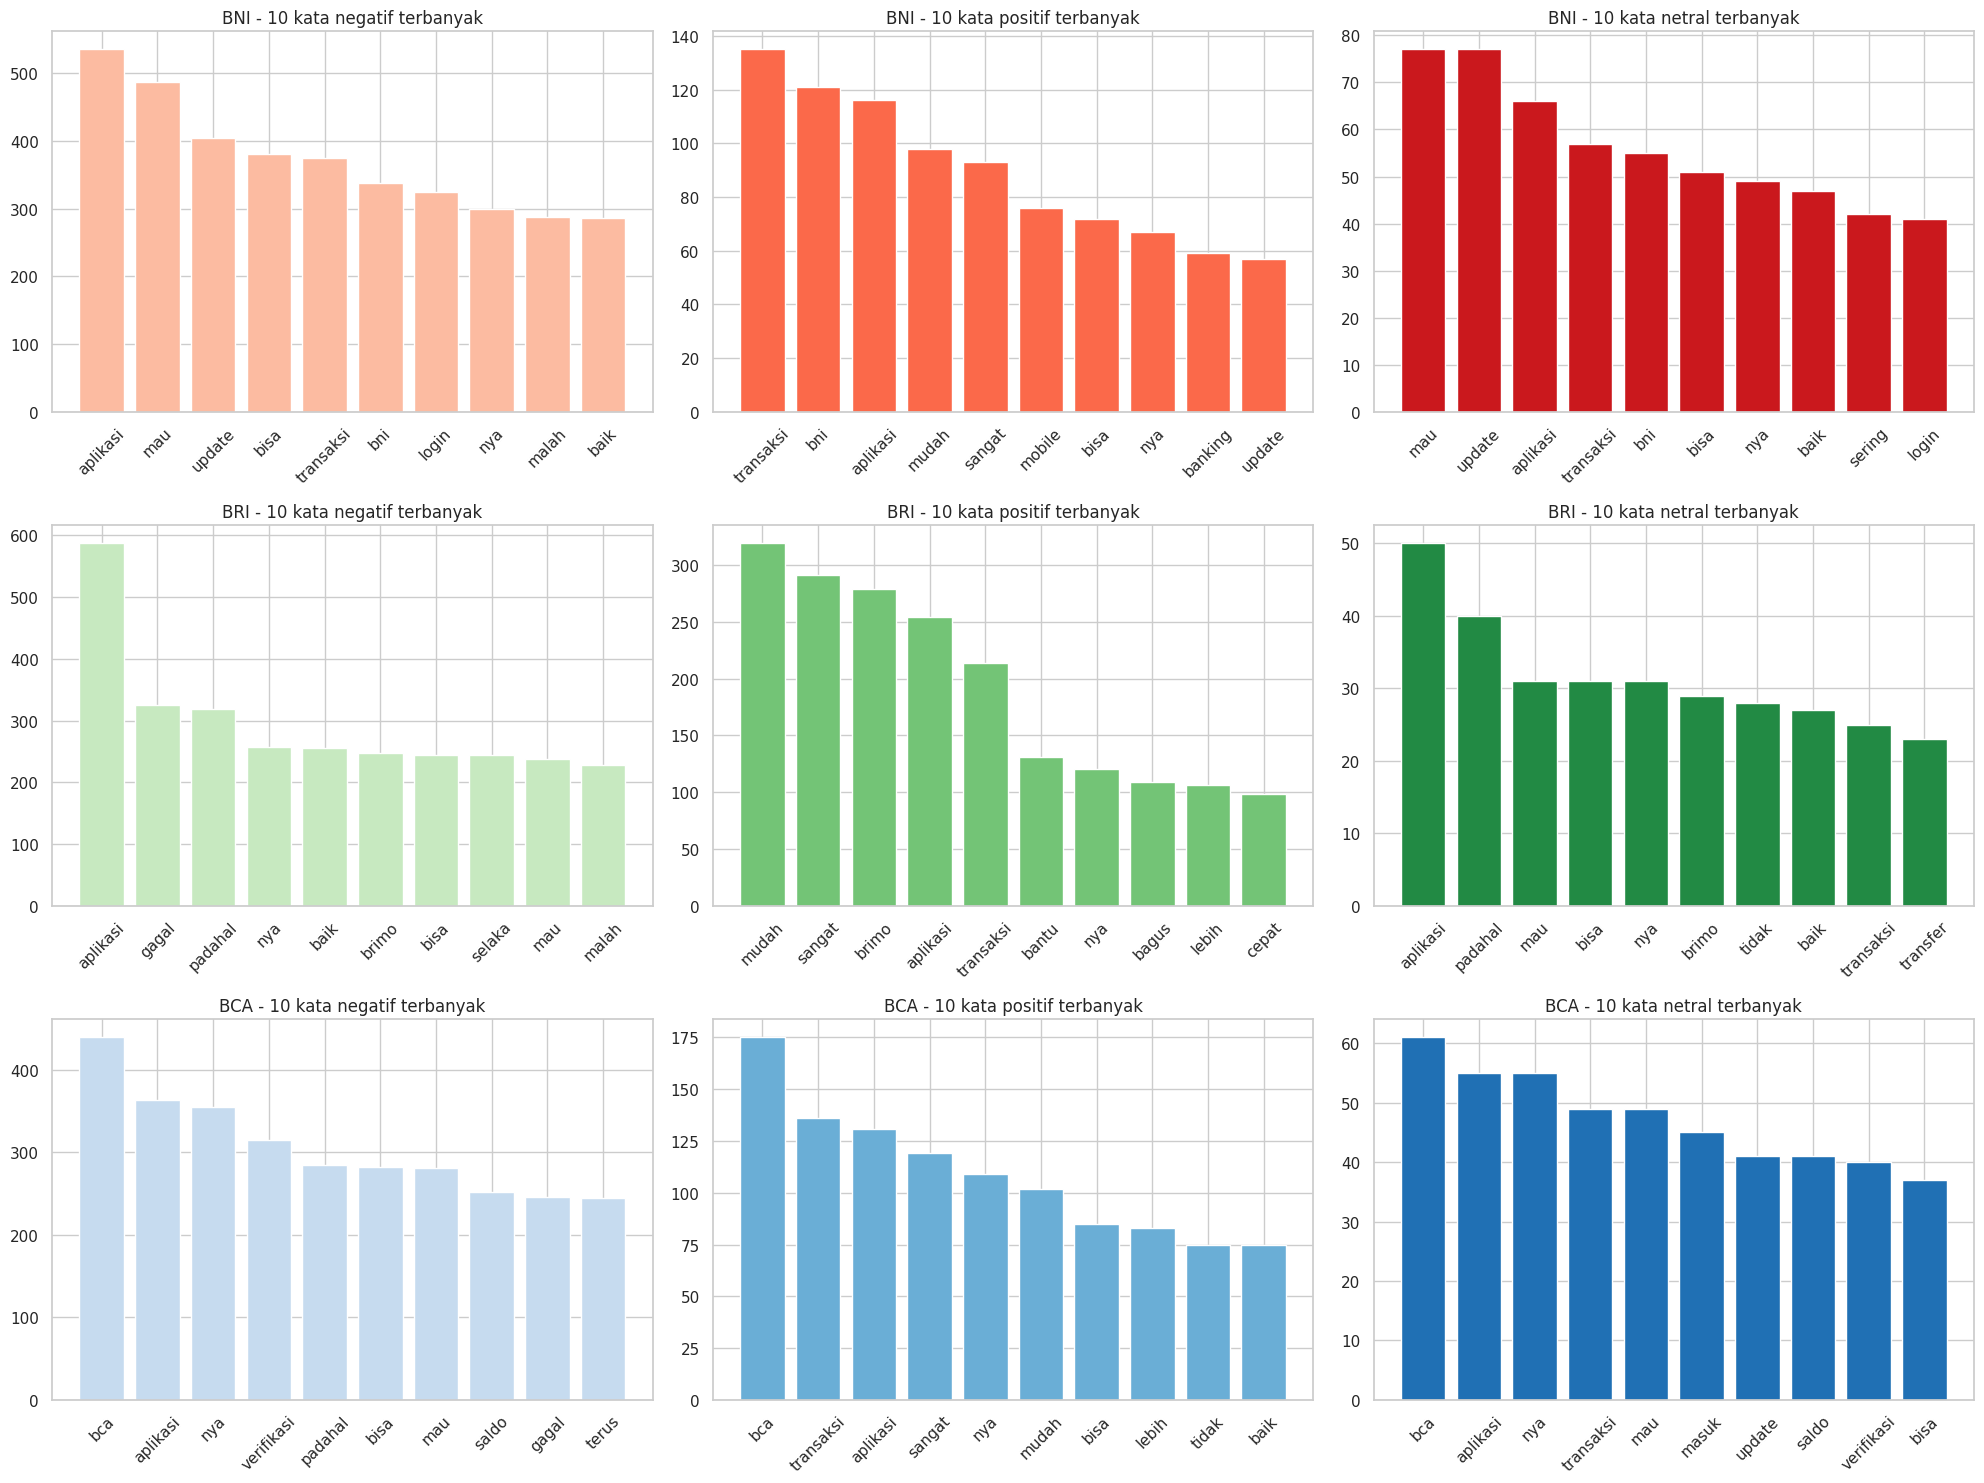

In [ ]:
def hitung_kata_terbanyak(df, aplikasi, sentimen):
  komentar = df[(df['application'] == aplikasi) & (df['sentimen'] == sentimen)]['content']
  kata_counter = Counter()
  komentar.apply(lambda x: kata_counter.update(x.split()))
  return pd.DataFrame(kata_counter.most_common(10), columns=['Kata', 'Frekuensi'])

def visualisasi_kata(top_kata_df, judul, warna, posisi):
  plt.subplot(3, 3, posisi)
  plt.bar(top_kata_df['Kata'], top_kata_df['Frekuensi'], color=warna)
  plt.title(judul)
  plt.xticks(rotation=45)

aplikasi_list = ['BNI','BRI', 'BCA']
sentimen_list = ['negatif', 'positif', 'netral']

palette = {
      'BNI' : sns.color_palette('Reds',3),
      'BRI' : sns.color_palette('Greens', 3),
      'BCA' : sns.color_palette('Blues', 3)
}

plt.figure(figsize=(20,15))

posisi = 1
for aplikasi in aplikasi_list:
  for idx, sentimen in enumerate(sentimen_list):
    top_kata_df = hitung_kata_terbanyak(df, aplikasi, sentimen)
    warna= palette[aplikasi][idx]
    judul = f'{aplikasi} - 10 kata {sentimen} terbanyak'
    visualisasi_kata(top_kata_df, judul, warna, posisi)
    posisi += 1

plt.tight_layout()
plt.show()

prepare data train

In [ ]:
df_bca = df[df['application'] == 'BCA']
df_bni = df[df['application'] == 'BNI']
df_bri = df[df['application'] == 'BRI']

In [ ]:
df_bni

,content,at,userName,score,application,sentimen,year
2099,note bni kalo mobile tunai lebih baik usah pak...,2022-12-31 20:50:01,M. Romi Alfianto,1,BNI,negatif,2022
2100,sempat rasa kecewa telah update guna telah uni...,2022-12-31 19:18:10,Bey Dalfir,4,BNI,positif,2022
2101,aplikasi bni mobile ku sekarang lot banget pas...,2022-12-31 13:13:13,babeh adv,3,BNI,netral,2022
2103,hallo aplikasi tidak buka terus apa sistem mai...,2022-12-31 09:00:09,Agus Yudhistira,2,BNI,negatif,2022
2105,makin kesini makin jelas terdetksi dapat aplik...,2022-12-31 01:28:33,Eko Nurbiantoro,1,BNI,negatif,2022
...,...,...,...,...,...,...,...
4194,sangat bantu transaksi uang,2024-09-02 11:21:30,wisnu ardi,5,BNI,positif,2024
4195,duka sangat kecewa sekatang gilir bgus aman se...,2024-09-02 11:19:21,GALIH SETIAWAN,5,BNI,positif,2024
4196,kalian maintenance aplikasi hari jam kerja ada...,2024-09-02 11:18:41,Bodhi Purwindarto,1,BNI,negatif,2024
4197,aplikasi sering update tidak yang baru mau log...,2024-09-02 11:16:29,Adi Kurniawan Suyud,1,BNI,negatif,2024


In [ ]:
X_bca = df_bca['content']
y_bca = df_bca['sentimen']

X_bni = df_bni['content']
y_bni = df_bni['sentimen']

X_bri = df_bri['content']
y_bri = df_bri['sentimen']

In [ ]:
data = {
    'BCA' : (X_bca, y_bca),
    'BNI' : (X_bni, y_bni),
    'BRI' : (X_bri, y_bri)
}

training data

In [ ]:
results = []

for app, (X, y) in data.items():
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

  vectorizer = CountVectorizer()
  x_train_vectorized = vectorizer.fit_transform(x_train).toarray()
  x_test_vectorized = vectorizer.transform(x_test).toarray()

  classifiers = {
      'KNN' : KNeighborsClassifier(n_neighbors=5),
      'RandomForest' : RandomForestClassifier(),
      'NaiveBayes' : MultinomialNB(),
      'SVM' : SVC(kernel='linear')
  }

  for clf_name, clf in classifiers.items():
    clf.fit(x_train_vectorized, y_train)
    y_pred = clf.predict(x_test_vectorized)

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results.append({
        'Application' : app,
        'Classifier' : clf_name,
        'Accuracy' : accuracy,
        'Recall' : recall,
        'Precision' : precision,
        'F1 Score' : f1
    })

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [ ]:
df_results = pd.DataFrame(results)
df_results

,Application,Classifier,Accuracy,Recall,Precision,F1 Score
0,BCA,KNN,0.617761,0.617761,0.640603,0.606108
1,BCA,RandomForest,0.741313,0.741313,0.668331,0.691715
2,BCA,NaiveBayes,0.745174,0.745174,0.668674,0.698798
3,BCA,SVM,0.637066,0.637066,0.632724,0.633573
4,BNI,KNN,0.590551,0.590551,0.631429,0.577754
5,BNI,RandomForest,0.732283,0.732283,0.633482,0.658590
6,BNI,NaiveBayes,0.724409,0.724409,0.642481,0.648788
7,BNI,SVM,0.633858,0.633858,0.579528,0.605263
8,BRI,KNN,0.470339,0.470339,0.624576,0.353190
9,BRI,RandomForest,0.826271,0.826271,0.803581,0.806854


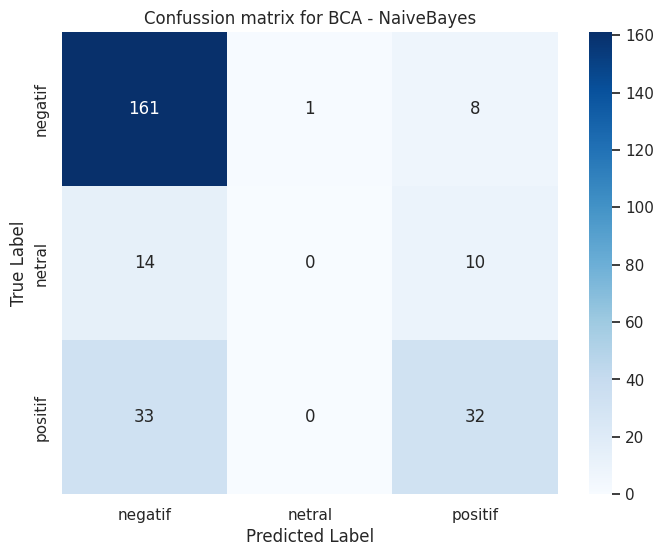

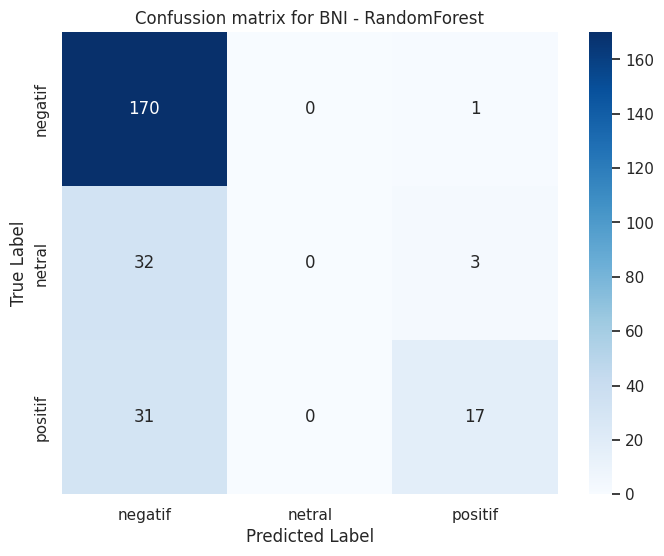

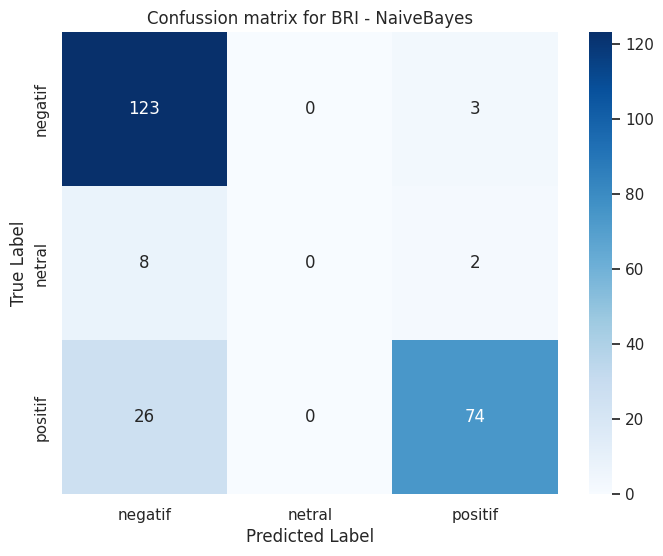

In [ ]:
best_classifiers = df_results.loc[df_results.groupby('Application')['Accuracy'].idxmax()]

for index, row in best_classifiers.iterrows():
  app = row['Application']
  clf_name = row['Classifier']

  x_train, x_test, y_train, y_test = train_test_split(data[app][0], data[app][1], test_size=0.15, random_state=42)
  vectorizer = CountVectorizer()
  x_train_vectorized = vectorizer.fit_transform(x_train).toarray()
  x_test_vectorized = vectorizer.transform(x_test).toarray()

  clf = classifiers[clf_name]
  clf.fit(x_train_vectorized, y_train)
  y_pred = clf.predict(x_test_vectorized)

  cm = confusion_matrix(y_test, y_pred)

  plt.figure(figsize=(8,6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels = np.unique(y_train), yticklabels=np.unique(y_train))

  plt.title(f'Confussion matrix for {app} - {clf_name}')
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.show()

<ipython-input-40-d68ab2176335>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=app_results_melted, x='Score', y='Classifier', hue='Metric', ax=ax, ci=None, palette=palette)
<ipython-input-40-d68ab2176335>:15: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.barplot(data=app_results_melted, x='Score', y='Classifier', hue='Metric', ax=ax, ci=None, palette=palette)
<ipython-input-40-d68ab2176335>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=app_results_melted, x='Score', y='Classifier', hue='Metric', ax=ax, ci=None, palette=palette)
<ipython-input-40-d68ab2176335>:15: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.barplot(data=app_results_melted, x='Score', y='Classifier', hue='Metric', ax=ax, ci=None, palette=palette)
<ipython-input-40-d68ab2176335

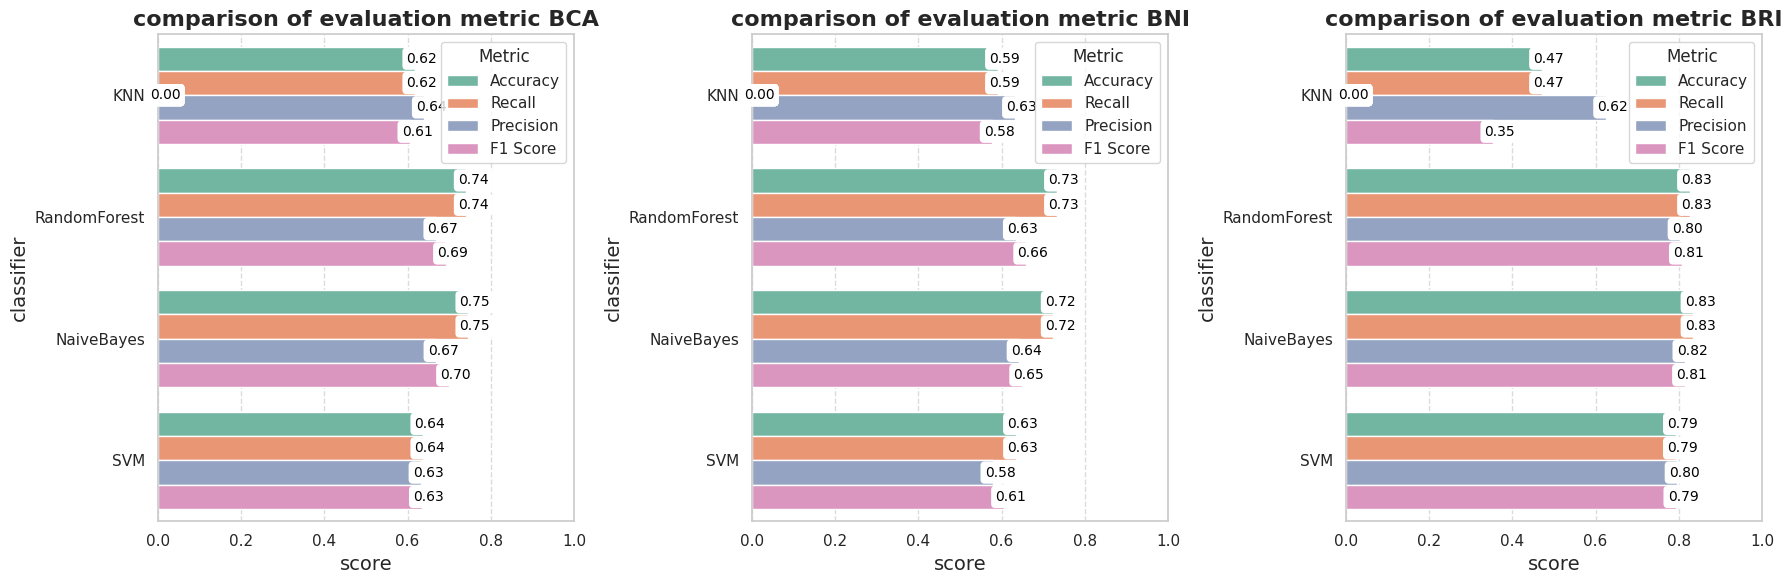

In [ ]:
sns.set(style='whitegrid')
palette = sns.color_palette('Set2')

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

applications = df_results['Application'].unique()

for ax, app in zip(axes, applications):
  app_results = df_results[df_results['Application'] == app]

  app_results_melted = app_results.melt(id_vars=['Application', 'Classifier'],
                                        value_vars=['Accuracy', 'Recall', 'Precision', 'F1 Score'],
                                        var_name='Metric', value_name='Score')

  sns.barplot(data=app_results_melted, x='Score', y='Classifier', hue='Metric', ax=ax, ci=None, palette=palette)

  ax.set_title(f'comparison of evaluation metric {app}', fontsize=16, weight='bold')
  ax.set_xlabel('score', fontsize=14)
  ax.set_ylabel('classifier', fontsize=14)
  ax.set_xlim(0,1)
  ax.tick_params(axis='y', rotation=0)

  ax.xaxis.grid(True, linestyle='--', alpha=0.7)

  for p in ax.patches:
    score = p.get_width()
    ax.annotate(f'{score:.2f}',
                (score, p.get_y() + p.get_height()/2),
                ha='center', va='center',
                color='black', fontsize=10,
                xytext=(5, 0),
                textcoords='offset points',
                bbox=dict(facecolor='white', edgecolor='none', boxstyle='round', pad=0.3))

plt.tight_layout()
plt.show()